In [1]:
import requests
import os

import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def print_image(plot, data, shape=(64, 64)):
    plot.imshow(np.flip(data.reshape(shape).T, 1), cmap=plt.get_cmap('gray'))
    plot.axis('off')

## Part 1. Implement PCA and Dual PCA algorithms

### <span style="color:red">=========== Assignment 1 ===========</span>

In [3]:
# PCA (with covariance implementation)

def my_pca(X):
    # Centralized the data
    X_hat = X - X.mean(axis=1).reshape(X.shape[0], 1)
    # Compute the covariance matrix by using centerlized data
    cov_matrix = np.cov(X_hat)
    # Compute the eigenvalues and eigenvectors using covariance matrix 
    eig_val, eig_vec = np.linalg.eig(cov_matrix)
    # Sort the eigenvalues in descending order, and sort the corresponding eigenvectors in eigenvalues order
    sorted_index = eig_val.argsort()[::-1]
    eig_val = eig_val[sorted_index]
    eig_vec = eig_vec[sorted_index]
    return eig_val, eig_vec

# Test your implementation
# eigenvalue = [7.93954312 0.06045688]
# eigen vectors = [[ 0.83849224 -0.54491354]
#                  [ 0.54491354  0.83849224]]
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X.T
val, vec = my_pca(X)
print(val)
print(vec)

[7.93954312 0.06045688]
[[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [4]:
# PCA (with SVD)

def my_dual_pca(X):
    # Centerlzied the data
    X_hat = X - X.mean(axis=1).reshape(X.shape[0],1)
    # Compute Y
    Y = np.divide(1, np.sqrt(X.shape[1]-1)) * X_hat
    # Singular value decomposition on Y. Sigma^2 can be regarded as eigenvalues, 
    # and u can be regarded as eigenvectors
    u, s, vh = np.linalg.svd(Y)
    return s**2, u

# Test your implementation
# eigenvalue = [7.93954312 0.06045688]
# eigen vectors = [[ 0.83849224 -0.54491354]
#                  [ 0.54491354  0.83849224]]
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X = X.T
val, vec = my_dual_pca(X)
print(val)
print(vec)

[7.93954312 0.06045688]
[[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Visualisation

### <span style="color:red">=========== Assignment 3 ===========</span>

In [5]:
# Import dataset
X = np.load('./Data/synthetic_data.npy', allow_pickle=True)

**Question (a)**

In [6]:
# Visualisation

# Use my_pca() function to get eigenvalues and eigenvectors of synthetic_data
val, vec = my_pca(X)

# Centerlized the data
X_hat = X - X.mean(axis=1).reshape(X.shape[0], 1)

# Project data to first, second and third principle component
PC1 = np.dot(X_hat.T, vec[:,0])
PC2 = np.dot(X_hat.T, vec[:,1])
PC3 = np.dot(X_hat.T, vec[:,2])

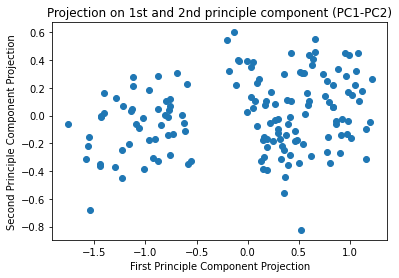

In [7]:
# Show the data projection on first and second principle component
plt.scatter(PC1, PC2)
plt.xlabel("First Principle Component Projection")
plt.ylabel("Second Principle Component Projection")
plt.title("Projection on 1st and 2nd principle component (PC1-PC2)")
plt.show()

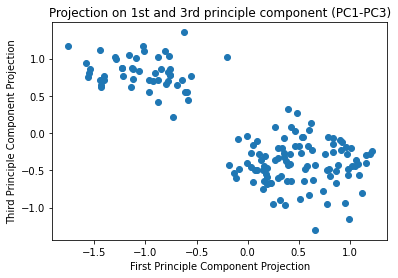

In [8]:
# Show the data projection on first and third principle component
plt.scatter(PC1, PC3)
plt.xlabel("First Principle Component Projection")
plt.ylabel("Third Principle Component Projection")
plt.title("Projection on 1st and 3rd principle component (PC1-PC3)")
plt.show()

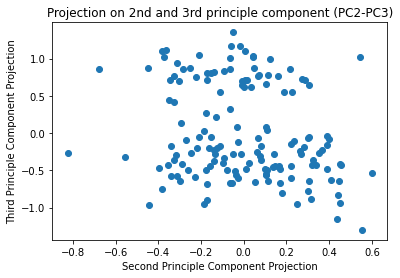

In [9]:
# Show the data projection on second and third principle component
plt.scatter(PC2, PC3)
plt.xlabel("Second Principle Component Projection")
plt.ylabel("Third Principle Component Projection")
plt.title("Projection on 2nd and 3rd principle component (PC2-PC3)")
plt.show()

**Question (b)**

In [10]:
val_sum = val.sum()
for i in range(len(val)):
    print("The interpretation rate at ", i+1, "th component is: %.4f%%" % ((val[i])/val_sum*100) )

The interpretation rate at  1 th component is: 81.5485%
The interpretation rate at  2 th component is: 7.8426%
The interpretation rate at  3 th component is: 5.5342%
The interpretation rate at  4 th component is: 5.0747%


From the PC1-PC2 and PC1 and PC3 figures, it can be inferred that this dataset should have two labels. Because the data is clearly divided into two clusters in the two-dimensional space, and the data in each cluster is relatively concentrated. In the PC2-PC3 figure, it is hardly to see how many labels the data has, as the boundaries are too blurry and it is difficult to extract useful information.

From the above code, the interpretation rate of the first principal component has reached 81.5%, which means that it can represent 81.5% of the raw data information and it is the most discriminative component. The interpretation rates from the second to the fourth principal component are low. This also explains that the PC1-PC2 and PC1-PC3 figures can interpret the raw data well, while PC2-PC3 looks terrible because there is no participation of the first principal component.

Therefore, for this data set, the first two principle components can be used for further experiment or analysis, which can reduce the storage and speed up the calculation.

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## Part 3. Image compression

### <span style="color:red">=========== Assignment 4 ===========</span>

**Question (a)**

PCA will lose some information after dimensionality reduction, in exchange for less features to represent the raw data. To balance the dimensionality and loss of the features, interpretation rate is used to determine the number of principal components. Interpretation rate refers to the percentage of information that the reduced data represents the raw data.

It is calculated by eigenvalues, the formula is: 
$$First\ N\ Principle\ Components\ Interpretation\ Rate = \frac{\sum_{i=1}^{N}Eigenvalue_i} {Sum\ of\ All\ Eigenvalues} \times{100\%}$$

Once the interpretation rate of the first N principal components exceeds 90%, then K=N, and the first K principal components are used for image compression. The 90% interpretation rate is sufficient for compression and does not lose much information compared to the raw data.

**Question (b)**

In [21]:
X, _ = np.load(f'./Data/Yale_64x64.npy', allow_pickle=True)

_, num_examples = X.shape
test_sample = 0

test_indices =  np.arange(test_sample, num_examples, 11)
train_indices = np.delete(np.arange(num_examples), test_indices) 

train_X = X[:, train_indices]
test_X = X[:, test_indices]

In [12]:
# Image compression
print("Train X shape: ", train_X.shape)

# Using my_dual_pca() function to get eigenvalues and eigenvectors
val, vec = my_dual_pca(train_X)

# Define serval variables: 
# interpre_rate: Stores the interpretation rate of first K principle components as a list
interpre_rate = []
# val_sum: The sum value of all eigenvalues
val_sum = val.sum()
# k: Store the first k number of principle components when interpretation rate greater or equal than 90%
k = 0
# The loop to find the k
for i in range(len(val)):
    temp_rate = (np.sum([m for m in val[0:i+1]]) / val_sum) * 100
    interpre_rate.append(temp_rate)
    if temp_rate>=90 and k==0:
        k=i+1
        print("When the interpretation rate >= 90%, K =", k, ", with rate: %.2f%%" % (temp_rate))

Train X shape:  (4096, 150)
When the interpretation rate >= 90%, K = 33 , with rate: 90.06%


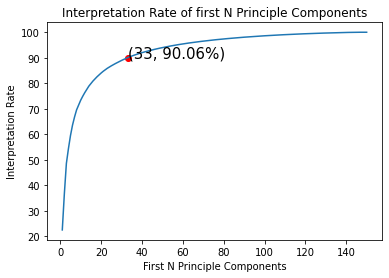

In [13]:
# Also show the Interpretation Rate of first N Principle Components
plt.plot([i+1 for i in range(len(interpre_rate))], interpre_rate)
plt.xlabel("First N Principle Components")
plt.ylabel("Interpretation Rate")
plt.title("Interpretation Rate of first N Principle Components")
plt.text(33, 90.06, '(33, 90.06%)', fontsize=15)
plt.scatter(33,90.07, color='r')
plt.show()

**Question (c)**

Get eigenfaces

In [14]:
# Select first k=33 principle components as eigenfaces
eigen_faces = vec[:, 0:k]
print("Eigenfaces shape: ", eigen_faces.shape)

Eigenfaces shape:  (4096, 33)


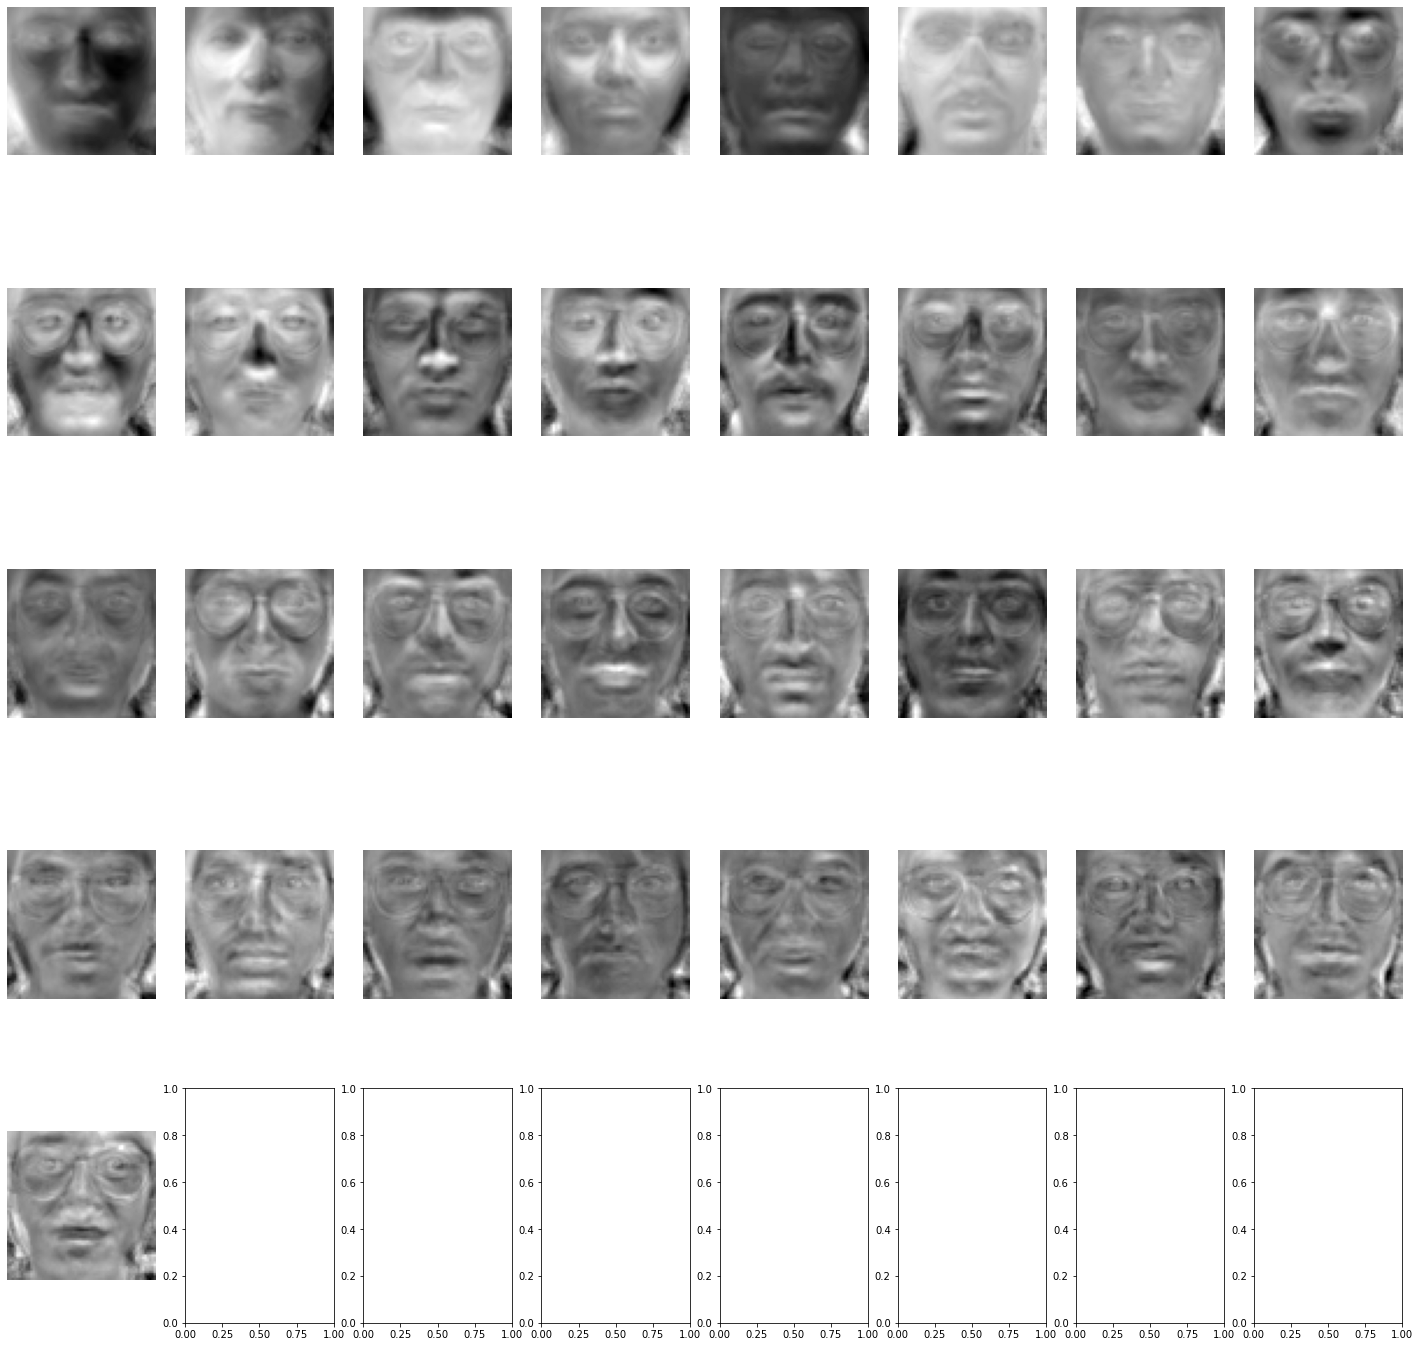

In [15]:
# plot eigenfaces
fig, axes = plt.subplots(int(k/8)+1,8, figsize=(25,25))
i=0
for row_ax in axes:
    for loc in row_ax:
        print_image(loc, eigen_faces[:,i])
        if i+1<k:
            i += 1
            continue
        break

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

**Question (a)**

Get mean matrix

In [16]:
m = train_X.mean(axis=1).reshape(train_X.shape[0],1)
print("m(mean) matrix shape: ", m.shape)

m(mean) matrix shape:  (4096, 1)


In [17]:
# Centerlized the test data
test_X_hat = test_X - m
# Encoding the centerlized test data using eigenfaces(k=33)
encoding = np.dot(eigen_faces.T, test_X_hat)
print("Table of low-dimensional representations of all the test images in", "%d×%d" % (encoding.shape[0] ,encoding.shape[1]), "format: ")
print(encoding)

Table of low-dimensional representations of all the test images in 33×15 format: 
[[-2.20566682e+03 -1.48429535e+03 -5.54936671e+02 -3.43233187e+02
  -5.41880249e+02 -2.18092679e+03  1.41299177e+03 -6.34544692e+02
  -1.05632173e+03 -9.14510441e+02 -1.46866788e+03 -1.47146747e+03
   2.19159365e+03 -1.95491936e+02  1.26005469e+03]
 [ 1.30003249e+02  9.96201262e+02 -9.99273914e+02  1.35122207e+02
  -2.85354412e+02  2.61341810e+03 -1.38050699e+03  8.30924068e+02
   1.46073331e+03 -6.29613019e+02  1.69066157e+03  1.03934356e+03
   3.38045927e+02  9.49334556e+02  3.03695964e+02]
 [ 7.00394960e+02 -1.49144837e+03  5.90945282e+02  3.16157418e+02
   1.02190834e+03 -3.30316177e+02  1.58834123e+03  7.44059467e+01
  -9.91926013e+02  1.61458523e+02  2.56743407e+03  4.85341432e+02
  -2.84163205e+02 -2.14371537e+01  7.42413177e+02]
 [-6.21239209e+02 -1.97631649e+02 -7.02729778e+02 -3.14554058e+01
  -7.21581123e+02 -7.78471536e+02  1.32093571e+03 -5.28587939e+02
  -2.07610888e+02  3.44835483e+02 -5.06

**Question (b)**

In [18]:
# Decoding the test data using eigenfaces(k=33)
decoding = np.dot(eigen_faces, encoding) + m
decoding.shape

(4096, 15)

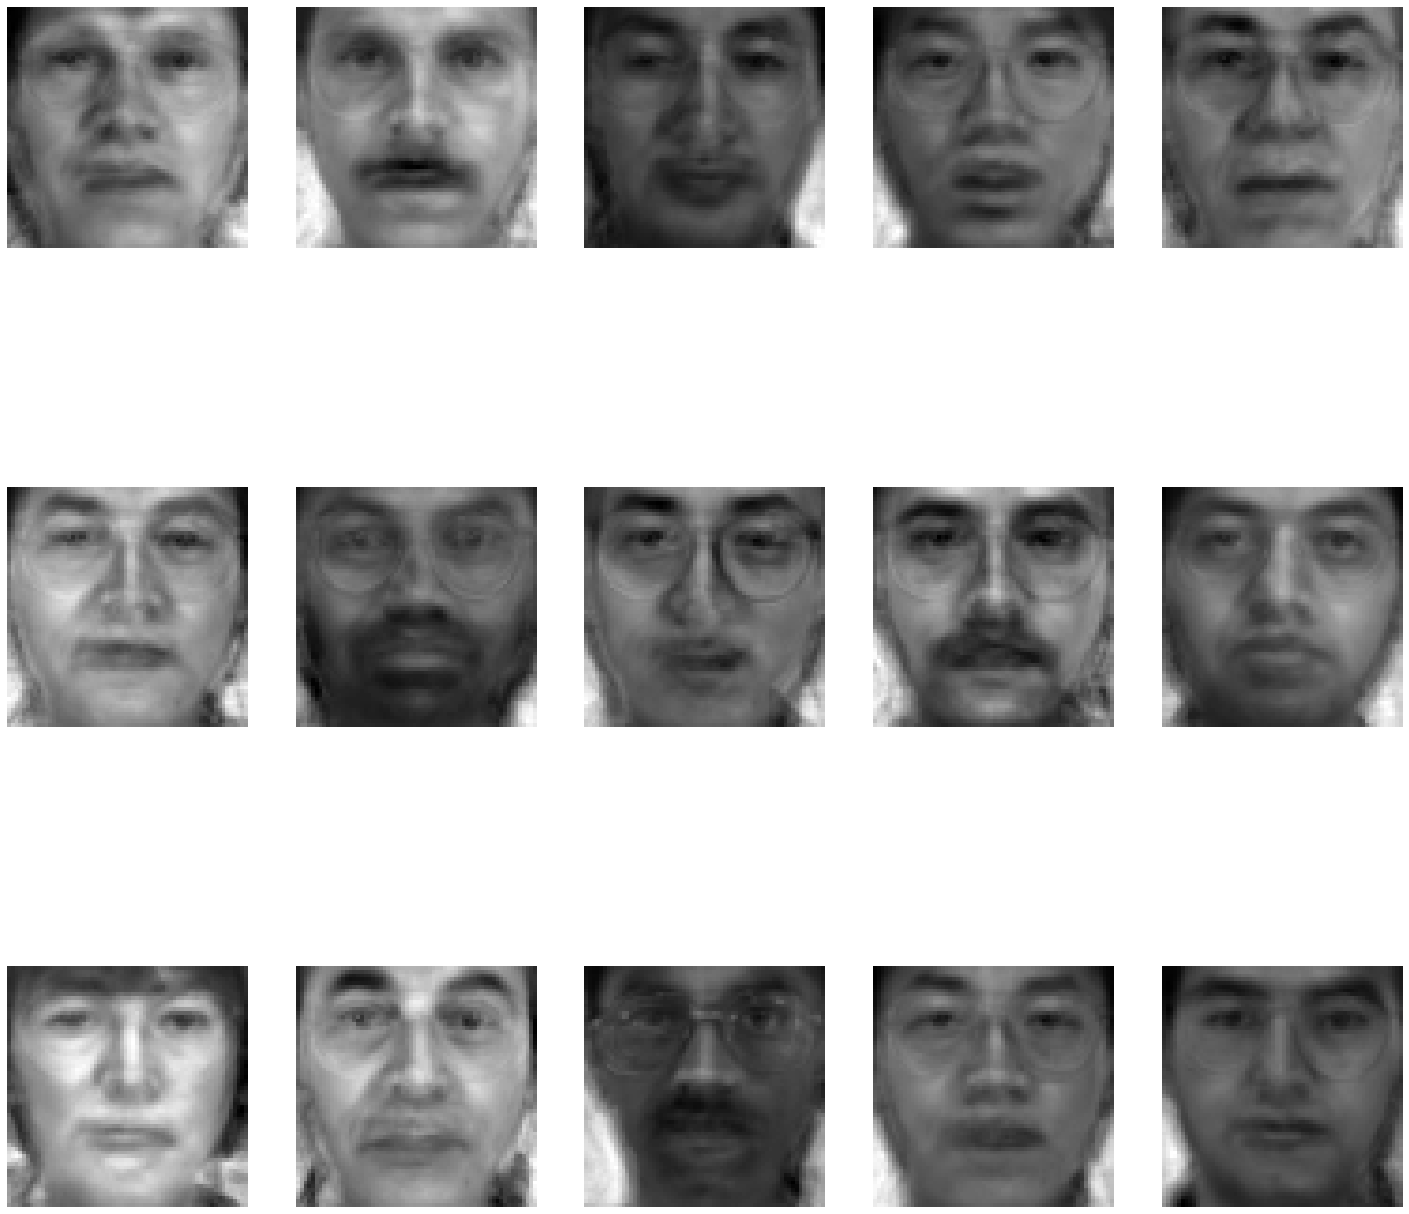

In [19]:
# plot decoded faces
fig, axes= plt.subplots(3, 5, figsize=(25,25))
i=0
for ax in axes:
    for loc in ax:
        print_image(loc, decoding[:,i])
        if i+1<k:
            i += 1
            continue
        break

**Question (c)**

Define the loss function: 
$$For\ Each\ Image\ Loss = \sqrt{ \sum_{i=1}^{all\ pixels} (raw_{i} - reconstructed_{i})^2}$$

That is: Use the row image to subtract each corresponding pixel of the reconstructed image, square it to ensure that there is no negative number, then sum all values, and finally compute the square root to reduce the magnitude of the loss

**Question (d)**

In [44]:
def loss(raw, recons):
    sum_loss = np.sum((raw - recons)**2)
    return np.sqrt(sum_loss)

In [45]:
for i in range(test_X.shape[1]):
    if i == 0:
        print("The loss of %dst image is:\t" % (i+1), loss(test_X[:, i], decoding[:, i]) )
        continue
    if i==1:
        print("The loss of %dnd image is:\t" % (i+1), loss(test_X[:, i], decoding[:, i]))
        continue
    if i==2:
        print("The loss of %drd image is:\t" % (i+1), loss(test_X[:, i], decoding[:, i]))
        continue

    print("The loss of %dth image is:\t" % (i+1), loss(test_X[:, i], decoding[:, i]))

The loss of 1st image is:	 1322.4571450881597
The loss of 2nd image is:	 1389.1522972985867
The loss of 3rd image is:	 1031.959412487222
The loss of 4th image is:	 1281.8264157613187
The loss of 5th image is:	 910.0872922017813
The loss of 6th image is:	 1544.8073595997914
The loss of 7th image is:	 1149.0378680544986
The loss of 8th image is:	 1688.6352275366341
The loss of 9th image is:	 1684.2845563021988
The loss of 10th image is:	 1278.0600669289875
The loss of 11th image is:	 1792.3575897123735
The loss of 12th image is:	 1469.484159364265
The loss of 13th image is:	 1673.4035423209862
The loss of 14th image is:	 1406.5719577136806
The loss of 15th image is:	 1095.706785778434


### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 4. Application: face recognition

### <span style="color:red">=========== Assignment 6 ===========</span>

**Question (a)**

Using PCA: Firstly, use the eigenfaces obtained in Assignment 4 dot product the centralized training data to obtain the encoding data, which is used to train the SVC (i.e. SVM) model of RBF kernel. Then, the encoding data of test data is obtained by the same way, and this test encoding data is introduced into the model as a parameter for prediction.

Using SVM: The centralized training data is directly introduced into the SVC model as a parameter for training, and then the centralized test data is introduced into the trained model for prediction.

When centerlized the data, the mean matrix is obtained in Assignment 5

In [46]:
train_X, train_y, test_X, test_y = np.load(f'./Data/Yale_64x64-part-4-persons.npy', allow_pickle=True)

In [47]:
# Comparison
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [48]:
# Use m obtained in Assignment 5, and Eigenfaces obtained in Assignment 4
print("Eigenfaces obtained in Assignment 4: ", eigen_faces.shape)
print("m(mean) matrix obtained in Assignment 5: ", m.shape)

Eigenfaces obtained in Assignment 4:  (4096, 33)
m(mean) matrix obtained in Assignment 5:  (4096, 1)


PCA and SVM(SVC) model

In [49]:
# Centerlized the data
train_x_hat = train_X - m
# Encoding the training data
encoding_train = np.dot(eigen_faces.T, train_x_hat)
print("Training data shape: ", encoding_train.shape)

# Use SVM (SVM classifer) and PCA data to train the model
clf_pca = make_pipeline(SVC(kernel='rbf'))
clf_pca.fit(X=encoding_train.T, y=train_y)

# Get the prediction and accuracy
test_X_hat = test_X - m
encoding_test = np.dot(eigen_faces.T, test_X_hat)
pca_pred = clf_pca.predict(encoding_test.T)

print("PCA accuracy: ", np.sum(pca_pred==test_y)/len(test_y))

Training data shape:  (33, 16)
PCA accuracy:  0.8333333333333334


SVM(SVC) with rbf kernel model

In [50]:
print("Training data shape: ", train_X.shape)
# Use SVM (SVM classifer) and raw data to train the model
clf = make_pipeline(SVC(kernel='rbf'))
clf.fit(train_x_hat.T, train_y)

# Get the prediction and accuracy
svc_pred = clf.predict(test_X_hat.T)
print("SVM accuracy: ", np.sum(svc_pred==test_y)/len(test_y))

Training data shape:  (4096, 16)
SVM accuracy:  0.8333333333333334


**Question (b)**

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [52]:
print("Using PCA: ")
print("Confusion matrix: \n", confusion_matrix(test_y, pca_pred))
print("Accuracy: ", accuracy_score(test_y, pca_pred))
print("F1 score: ", f1_score(test_y, pca_pred))
print("Precision score: ", precision_score(test_y, pca_pred))
print("Recall score: ", recall_score(test_y, pca_pred))

Using PCA: 
Confusion matrix: 
 [[ 8  4]
 [ 0 12]]
Accuracy:  0.8333333333333334
F1 score:  0.8571428571428571
Precision score:  0.75
Recall score:  1.0


In [53]:
print("Using SVM: ")
print("Confusion matrix: \n", confusion_matrix(test_y, svc_pred))
print("Accuracy: ", accuracy_score(test_y, svc_pred))
print("F1 score: ", f1_score(test_y, svc_pred))
print("Precision score: ", precision_score(test_y, svc_pred))
print("Recall score: ", recall_score(test_y, svc_pred))

Using SVM: 
Confusion matrix: 
 [[ 8  4]
 [ 0 12]]
Accuracy:  0.8333333333333334
F1 score:  0.8571428571428571
Precision score:  0.75
Recall score:  1.0


As can be seen above, the two models are identical in accuracy, F1 score, confusion matrix and other scores. For the PCA model, only 33 features (dimensions) are used, which greatly reduces the storage and calculating time. This shows that on the raw dataset, there are many features that are useless for classification tasks. PCA calculates the main features that affect classification through a series of transformations. Therefore, the performance of the classification model using PCA data is the same as that of using the raw data.

### <span style="color:red">=========== End of Assignment 6 ===========</span>